# Importing Data and Libraries


In [1]:
import seaborn as sns  #for plotting
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #so that we dont have to give dffrnt command for plotting
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # to work on plotly offline
import plotly
import cufflinks as cf
cf.go_offline()

df0=pd.read_csv('all_house_senate_2010.csv')
df2=pd.read_csv('all_house_senate_2012.csv')
df4=pd.read_csv('all_house_senate_2014.csv')
df6=pd.read_csv('all_house_senate_2016.csv', encoding='ISO-8859-1')
# Imported data through Pandas, named them df0,df2,df4,df6

df1=df0[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta','dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]
df3=df2[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta','dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]
df5=df4[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta','dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]
df7=df6[['com_id','com_nam','can_id','can_nam','ele_yea','can_off','can_off_sta','dis_dat','dis_amo','dis_pur_des','rec_cit','rec_com_id','rec_nam','rec_sta']]
#Only used the necessary columns which could be used in visualisation or of particular intersest
# Putting that new updataed data in df1,df3,df5,df7


db=pd.concat([df1,df3,df5,df7])  #adding all those4 dataframe in one data frame named 'db'


db['dis_amo'] = (db['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
# there was one column namely 'dis_amo' which was shown as currency i.e with $ sign, so first removed that $ sign 
#then converting that column to float 


D:\python\a\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.

D:\python\a\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (16,22) have mixed types. Specify dtype option on import or set low_memory=False.

D:\python\a\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



# Seeing the Dataset on a Lager picture
We will do the work only on 2 states, So to decide which states to chose we will see both the results and develop intersest in 2 states 


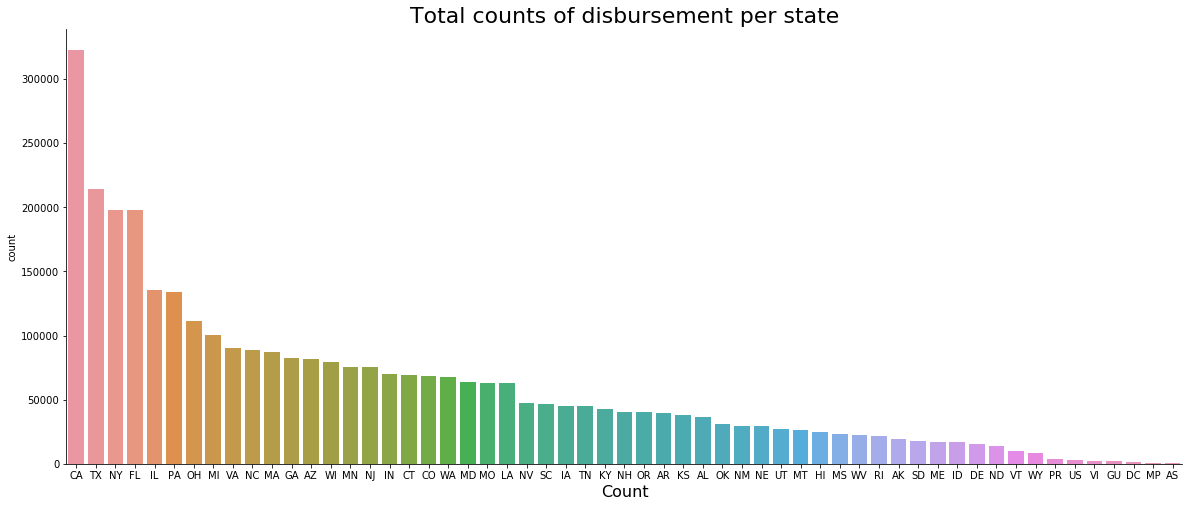

In [225]:
ax1=sns.countplot(x='can_off_sta',data=db, order=db.can_off_sta.value_counts().index)
# using seaborn library count plot the no. of disbursement to have a larger picture of states
ax1.figure.set_size_inches(20,8) #changing the size of figure

ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
# Remove the plot frame lines. They are unnecessary chartjunk.  

plt.xlabel("Count", fontsize=16)  #Changing the Size of x label
plt.title("Total counts of disbursement per state", fontsize=22)  #setting the Title



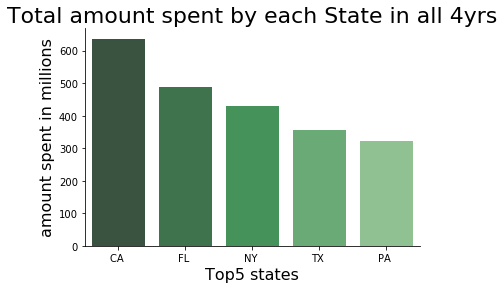

In [218]:
d2=db.groupby(['can_off_sta'])['dis_amo'].sum().sort_values(ascending=False)/1000000
#Changing the DataFrame by group by function of states and seeing their total disbursement amount by 'sum()' Function
#devided by 1000000  so that the figures would be in millions and would be easy to understand

d2=d2.add_suffix(' ').reset_index()
# When we applied groupby function the dataframe is changed into a series 
# we reset its index and add something in suffix so that we could perform further operation 

ax3=sns.barplot(x='can_off_sta',y='dis_amo', data=d2.iloc[:5],palette="Greens_d")
#We make a barplot from updated data frame d2, we take 5 entries of those states which are higher in disbursement 
# we are seeing the sum of all the 4 yrs per state



ax3.spines["top"].set_visible(False)  #Remove the plot frame lines
ax3.spines["right"].set_visible(False)# Remove the plot frame lines
ax3.get_xaxis().tick_bottom()  
ax3.get_yaxis().tick_left() 
plt.xlabel("Top5 states", fontsize=16)  #Setting xlabels 
plt.ylabel("amount spent in millions", fontsize=16) #Setting xlabels 
plt.title("Total amount spent by each State in all 4yrs", fontsize=22) #Giving the Title

# Finding Facts and Studies on Texas and California 

These 2 states are the biggest states with max. no transactions made with the max. amount spend combining in all the 4yrs.
Now we will try to compare these 2states with the total and will try to find some interseting or common facts

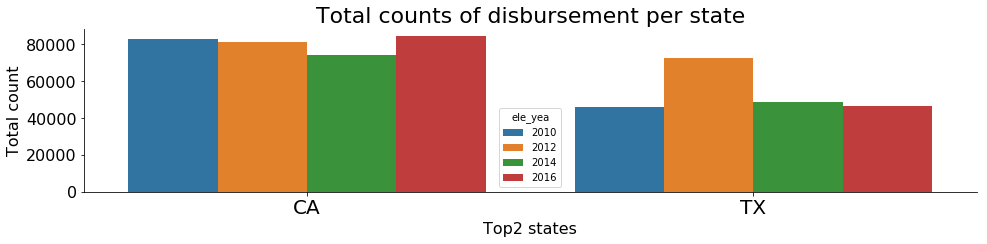

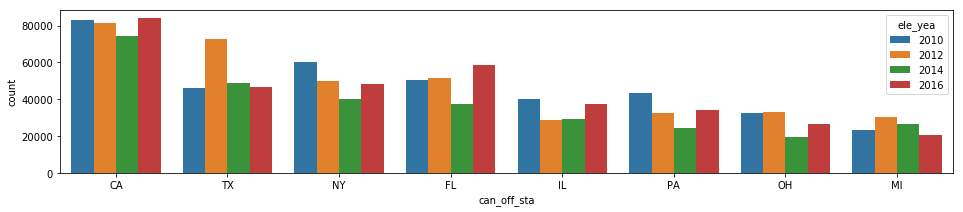

In [231]:
plt.figure(figsize=(16,3))

ax=sns.countplot(x='can_off_sta',data=db,hue='ele_yea', order=db.can_off_sta.value_counts().iloc[:2].index)
#count plot of disbursement per state for different years
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
# Ticks on the right and top of the plot are generally unnecessary chartjunk. 
plt.ylabel("Total count", fontsize=16)  

plt.xlabel("Top2 states", fontsize=16)  
plt.title("Total counts of disbursement per state", fontsize=22)
plt.yticks( fontsize=16)  #Changing the font size
plt.xticks( fontsize=20)

plt.figure(figsize=(16,3))
ax13=sns.countplot(x='can_off_sta',data=db,hue="ele_yea", order=db.can_off_sta.value_counts().iloc[:8].index)

#We observed that CA is spending almost same amount in all the years
#wheras if we see the texas, and comparing to all the states we see they are spending a lot in 2012 as compared to other years



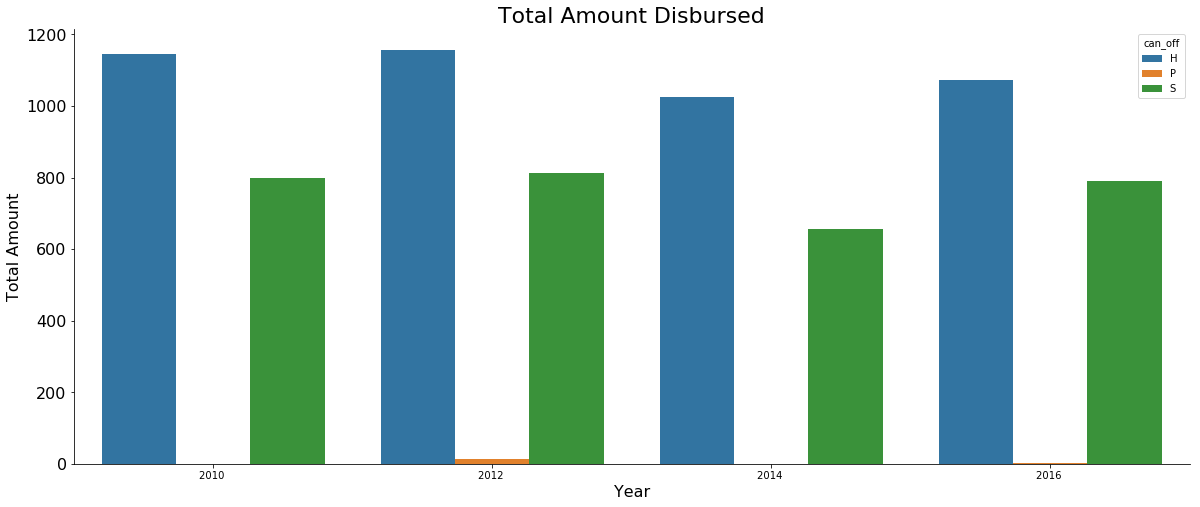

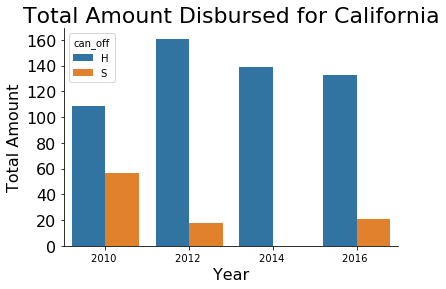

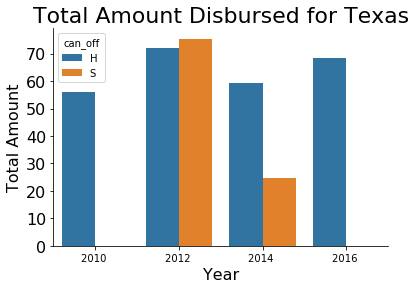

In [81]:
a=db.groupby(['can_off','ele_yea'])['dis_amo'].sum()/1000000
b=db[db.can_off_sta == 'CA'].groupby(['can_off','ele_yea'])['dis_amo'].sum()/1000000
c=db[db.can_off_sta == 'TX'].groupby(['can_off','ele_yea'])['dis_amo'].sum()/1000000
# making a new dataframe for CA only and TX only 

a=a.add_suffix(' ').reset_index()
b=b.add_suffix(' ').reset_index()
c=c.add_suffix(' ').reset_index()
# modifying list again



plt.figure()
a1=sns.barplot(x='ele_yea',y='dis_amo',hue='can_off', data=a)
plt.xlabel("Year", fontsize=16)  
plt.ylabel("Total Amount", fontsize=16)  
plt.title("Total Amount Disbursed", fontsize=22)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)

#Total amount disbursed per house in all the 4yrs in all states



plt.figure()
a2=sns.barplot(x='ele_yea',y='dis_amo',hue='can_off', data=b)
plt.xlabel("Year", fontsize=16)  
plt.ylabel("Total Amount", fontsize=16)
plt.title("Total Amount Disbursed for California", fontsize=22)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)
#Total amount disbursed per house in all the 4yrs in California


plt.figure()
a3=sns.barplot(x='ele_yea',y='dis_amo',hue='can_off', data=c)
plt.xlabel("Year", fontsize=16)  
plt.ylabel("Total Amount", fontsize=16)  
plt.title("Total Amount Disbursed for Texas", fontsize=22)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)

#Total amount disbursed per house in all the 4yrs in Texas


a1.figure.set_size_inches(20,8)
a1.spines["top"].set_visible(False)  
a1.spines["right"].set_visible(False)

#a2.figure.set_size_inches(20,8)
a2.spines["top"].set_visible(False)  
a2.spines["right"].set_visible(False)

#a3.figure.set_size_inches(20,8)
a3.spines["top"].set_visible(False)  
a3.spines["right"].set_visible(False)


#Texas Senators didn't spend anything on 2010 whereas in 2012 they spent more then the avg and more from Houses
# California senators dednt spend any amount in 2014
# we see the avg anount spent on 2010 is more as compared to other years whereas in case of CL and TX it is higher in 2010 
#Another intersting fact we found that in 2012 presedent candidate also spent that was the year of presedential election


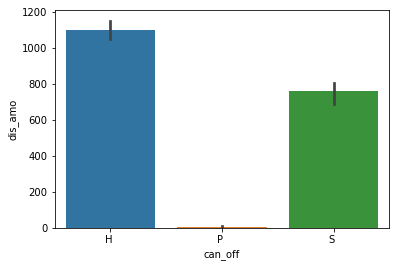

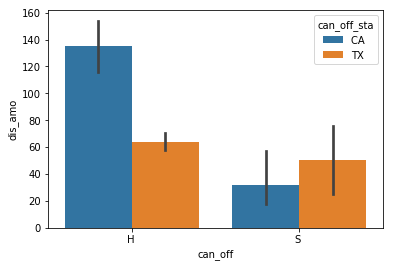

In [217]:
x=db.groupby(['can_off','ele_yea'])['dis_amo'].sum()/1000000
y=db[(db['can_off_sta']=='TX') | (db['can_off_sta']=='CA')] #Creating a datframe of TX and CL
z=y.groupby(['can_off','ele_yea','can_off_sta'])['dis_amo'].sum()/1000000



x=x.add_suffix(' ').reset_index()

z=z.add_suffix(' ').reset_index()

plt.figure()
x1=sns.barplot(x='can_off',y='dis_amo', data=x)
plt.figure()
z1=sns.barplot(x='can_off',y='dis_amo',hue='can_off_sta', data=z)


# We see a general pattern where each state is spending more from House candidates
#their is a differnt pattern we observed in 2012, that Texas spent more from Senator candidates


# Seeing the general pattern of spending of TX and CA and comparing it with some states

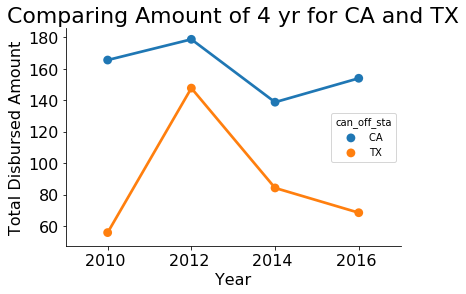

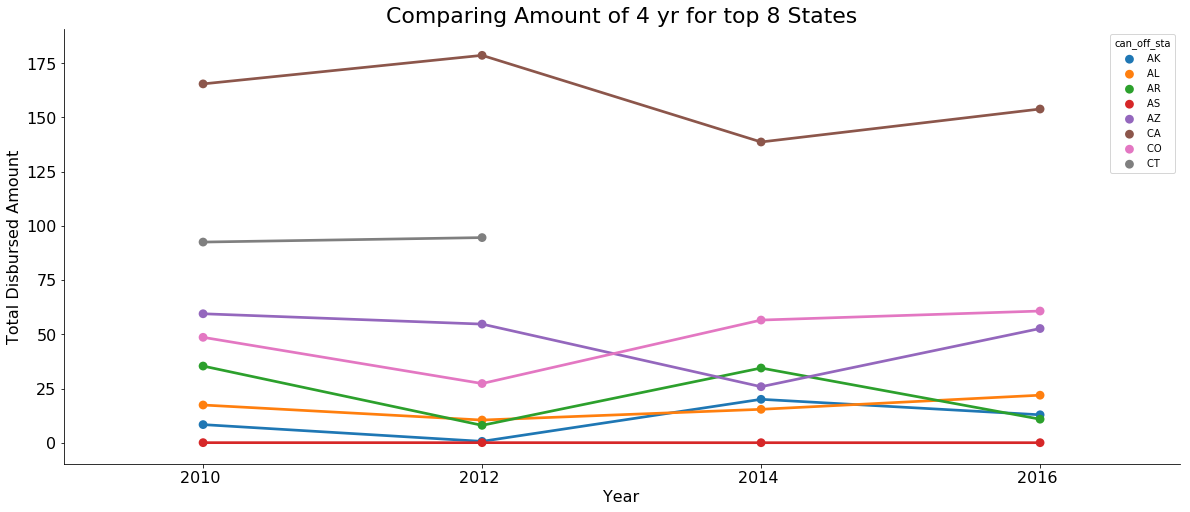

In [159]:
bn=db[(db['can_off_sta']=='TX') | (db['can_off_sta']=='CA')]
de=bn.groupby(['can_off_sta','ele_yea'])['dis_amo'].sum()/1000000
de=de.add_suffix(' ').reset_index()
dt=db.groupby(['can_off_sta','ele_yea'])['dis_amo'].sum()/1000000
dt=dt.add_suffix(' ').reset_index()
#sns.barplot(x='can_off_sta',y='dis_amo',hue='ele_yea', data=de)
plt.figure()
a4=sns.pointplot(x="ele_yea", y="dis_amo", hue="can_off_sta", data=de)
plt.xlabel("Year", fontsize=16)  
plt.ylabel("Total Disbursed Amount", fontsize=16)
plt.title("Comparing Amount of 4 yr for CA and TX", fontsize=22)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)


plt.figure()
a5=sns.pointplot(x="ele_yea", y="dis_amo", hue="can_off_sta", data=dt.head(30) )
plt.xlabel("Year", fontsize=16)  
plt.ylabel("Total Disbursed Amount", fontsize=16)
plt.title("Comparing Amount of 4 yr for top 8 States", fontsize=22)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)



#a4.figure.set_size_inches(20,8)
a4.spines["top"].set_visible(False)  
a4.spines["right"].set_visible(False)

a5.figure.set_size_inches(20,8)
a5.spines["top"].set_visible(False)  
a5.spines["right"].set_visible(False)


# We found the facts that for some states spending is consistent 
#It is changing a lot in these 2 dffrnt states 
# from 2014-2016 patter differed

# Seeing the states of top candidates acc. to their spending


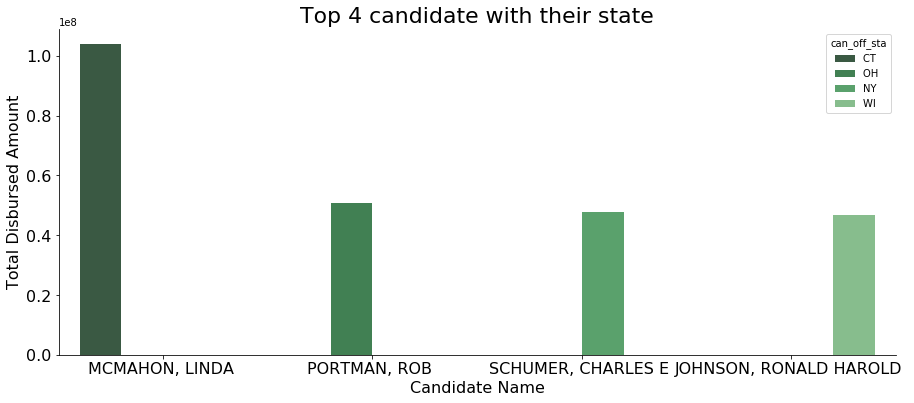

In [86]:
d2=db.groupby(['can_nam','can_off_sta'])['dis_amo'].sum().sort_values(ascending=False).iloc[:4]

d2
d2=d2.add_suffix(' ').reset_index()
plt.figure(figsize=(15,6))
a6=sns.barplot(x='can_nam',y='dis_amo',hue="can_off_sta", data=d2, palette="Greens_d")
plt.xlabel("Candidate Name", fontsize=16)  
plt.ylabel("Total Disbursed Amount", fontsize=16)
plt.title("Top 4 candidate with their state", fontsize=22)
plt.yticks( fontsize=16)
plt.xticks( fontsize=16)

a6.spines["top"].set_visible(False)  
a6.spines["right"].set_visible(False)


#Although the most amount disbursed was from TX and CA but We see that the top4 candidates are neither from TX nor from CA
#that means per candidate disburse amount is high  

# Cheking the mean of disbursement per state

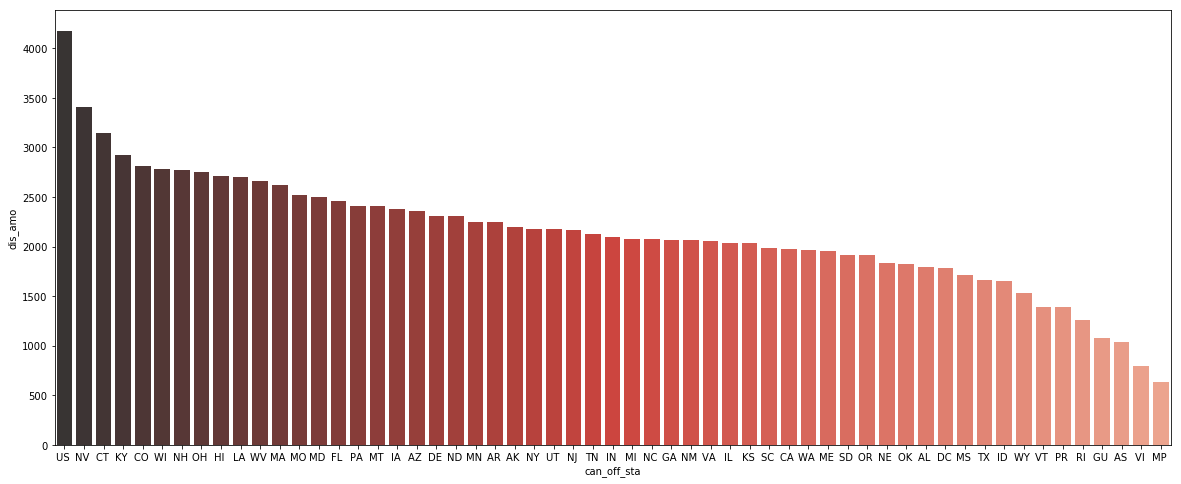

In [156]:



d1=db.groupby(['can_off_sta'])['dis_amo'].mean().sort_values(ascending=False)
d1=d1.add_suffix(' ').reset_index()
ax1=sns.barplot(x='can_off_sta',y='dis_amo', data=d1, palette="Reds_d")
ax1.figure.set_size_inches(20,8)

# The highest spending was done from President candidates


# Seeiing the total amount per states on US map

In [55]:
st=db[['can_off_sta','dis_amo']].groupby(['can_off_sta'])['dis_amo'].sum()/1000000
st
st=st.add_suffix('').reset_index()
# st
df=pd.DataFrame()
df['State']=dict(db.groupby("can_off_sta")['dis_amo'].sum()).keys()
df['exp']=dict(db.groupby("can_off_sta")['dis_amo'].sum()).values()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [52]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['State'],
        z = df['exp'],   #astype(float),
        locationmode = 'USA-states',
        
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]
layout = dict(
        title = 'Map',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )


# Checking the amount recieved by states and finding top 10

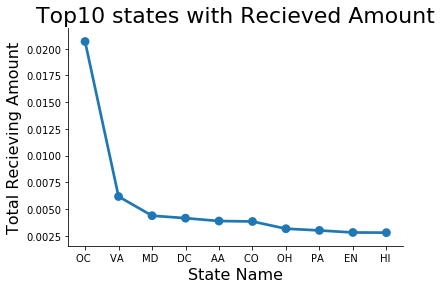

In [209]:
d5=db.groupby(['rec_sta'])['dis_amo'].mean().sort_values(ascending=False)/1000000
d5
d5=d5.add_suffix(' ').reset_index()

ax5=sns.pointplot(x='rec_sta',y='dis_amo', data=d5.iloc[:10])
# ax5.figure.set_size_inches(20,8)
plt.xlabel("State Name", fontsize=16)  
plt.ylabel("Total Recieving Amount", fontsize=16)
plt.title("Top10 states with Recieved Amount", fontsize=22)
plt.yticks( fontsize=10)
plt.xticks( fontsize=10)

ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)

# Those are the states with less disbursement amount but high recieving amount

# Seeing the most common Purpose

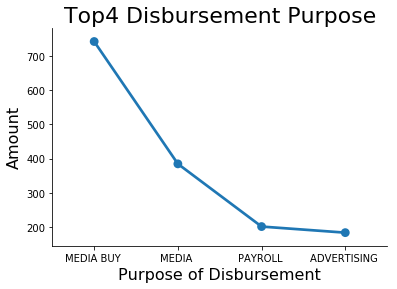

In [210]:
v=db.groupby(['dis_pur_des'])['dis_amo'].sum().sort_values(ascending=False)/1000000
v=v.add_suffix(' ').reset_index()
ax78=sns.pointplot(x='dis_pur_des',y='dis_amo', data=v.iloc[:4])
plt.xlabel("Purpose of Disbursement", fontsize=16)  
plt.ylabel("Amount", fontsize=16)
plt.title("Top4 Disbursement Purpose", fontsize=22)
plt.yticks( fontsize=10)
plt.xticks( fontsize=10)
ax78.spines["top"].set_visible(False)  
ax78.spines["right"].set_visible(False)

# Media BUy is extremly high as compare to others , People are spending a lot on it
